In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
data = pd.read_csv('/content/Data.csv')


In [ ]:
import pandas as pd

# Selecting the relevant columns
selected_columns = ['x1', 'x2', 'x3', 'x4', 'y']
selected_data = data[selected_columns]

# Calculating the correlation matrix
correlation_matrix = selected_data.corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          x1        x2        x3        x4         y
x1  1.000000 -0.021450  0.512738 -0.082957 -0.323314
x2 -0.021450  1.000000 -0.001640  0.242546  0.233981
x3  0.512738 -0.001640  1.000000 -0.119711 -0.203877
x4 -0.082957  0.242546 -0.119711  1.000000  0.593559
y  -0.323314  0.233981 -0.203877  0.593559  1.000000


In [ ]:
X = data[['x1', 'x2', 'x3', 'x4']]
y = data['y']


In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initializing the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters

In [ ]:
# Fitting the model with the training data
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Making predictions on the testing set
predictions = rf.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

In [ ]:
# Assuming 'threshold' is the acceptable range for accuracy
threshold = 0.1  # Define your acceptable threshold here

# Calculate accuracy within the defined threshold
within_threshold = sum(abs(predictions - y_test) <= threshold) / len(y_test)

print(f"Accuracy within {threshold}: {within_threshold * 100:.2f}%")


Accuracy within 0.1: 94.24%


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared
r_squared = r2_score(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Display the computed statistics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Squared Error (MSE): 0.0030
R-squared: 0.9479
Mean Absolute Error (MAE): 0.0319


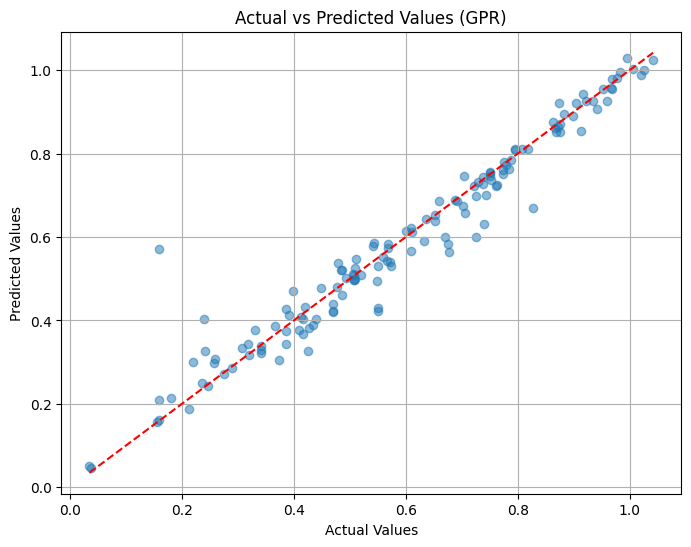

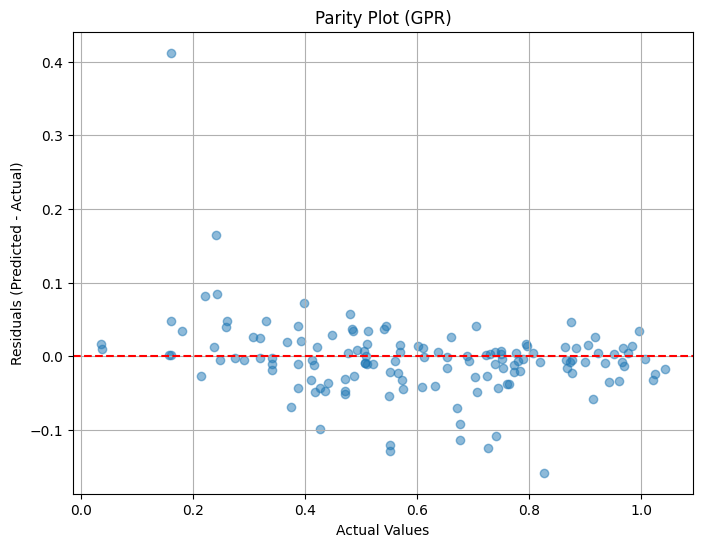

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'predictions' contains the GPR model predictions
# Assuming 'y_test' contains the actual target values from the test set

# Scatter plot for predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (GPR)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line for reference
plt.grid(True)
plt.show()

# Parity plot (plotting predicted vs actual differences)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions - y_test, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Parity Plot (GPR)')
plt.axhline(y=0, color='r', linestyle='--')  # Zero line for reference
plt.grid(True)
plt.show()
